Predicting salaries of employees in a company xyz based on their years of experience 

An important part of our data generation is adding random noise to the labels. In any real-world process, whether natural or man-made, the data does not exactly fit to a trend. There is always noise or other variables in the relationship we cannot measure. In the 
salary prediction example, the trend between YearsExperience and Salary is linear, but the salaries do not lie exactly on a line because of other factors influencing Salaries like qualification and skills etc.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset=pd.read_csv("Salary_Data.csv")
X = dataset.iloc [: , :-1].values #all rows of all columns except the last column
#Independent features variable X represents YearsExperience
y = dataset.iloc [: , -1].values #all rows of only the last column
#Target output variable y represents Salary

In [0]:
dataset.head(10) #to know the column labels of the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [0]:
dataset.tail() #to know the totsl no. of entries from the last row index of the dataset

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [0]:
dataset.shape #gives the no of rows n columns in the dataset ie the total no. of entries 

(30, 2)

Handling Missing Values

In [0]:
dataset.isnull().sum() 
#checks for missing values in the dataset--if any, replace with mean of the column
#fill all nan values with a single value ,not a good solution
#so pandas provides an alternative for that
'''new_dataset = dataset.fillna({
    'YearsExperience':'0',
    'Salary':dataset.Salary.mean(),
})
new_dataset '''

"new_dataset = dataset.fillna({\n    'YearsExperience':'0',\n    'Salary':dataset.Salary.mean(),\n})\nnew_dataset "

Encoding categorical data--not reqd in this dataset as both columns have integer values only

Splitting dataset into training set and test set

In [0]:
from sklearn.model_selection import train_test_split 
#SciKit Learn has model_selection module which contains the train_test_split method to split entire dataset to training and testing sets
#train_test_split returns 4 matrices- training features,testing features,trainign target output, testing target 

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
#arguments-matrix of features, matrix of dependent variable, testing dataset size percentage should be either 20 or 25%, random_state=0 


In [0]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]
[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


Feature Scaling--not required in a single feature

In [0]:
'''from sklearn.preprocessing import StandardScaler
ss_X=StandardScaler(dataset)
dataset'''

'from sklearn.preprocessing import StandardScaler\nss_X=StandardScaler(dataset)\ndataset'

Apply Linear Regression model from SciKit Learn library--linear_model module

So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

y=mx+c

Formula for 'm' of n datapoints: 

Formula for 'c' of n datapoints:

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#object of class
lr.fit(X_train,y_train) #apply linear regression to training dataset 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr.intercept_ #training dataset constant 'c' which is used to predict the y_test value
# y=mx+c formula was applied to find constant intercept from the values of training dataset

26780.09915062818

In [0]:
lr.coef_ #training dataset slope 'm' which will be used to predict the y_test value
#slope = (y2-y1)/(x2-x1) for n points formula was applied to find slope from the values of training dataset 

array([9312.57512673])

This means that for every one unit of change in YearsExperience, the change in the Salary is about 0.93%

Predict test set results

In [0]:
#predict() method is used to make test set predictions
y_pred=lr.predict(X_test)
#y_pred stores the predicted value of test set target output
y_pred
#calculated value of y_pred is compared to the actual values of the target output in the test dataset to find accuracy and calculate errors

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

Calculate errors--also called Cost Function

compare value obtained of y_pred by Linear Regression to the actual value of the target output column values in the test dataset to find errors and accuracy of model

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)
r_score = r2_score(y_test, y_pred)
print('Root mean squared error:',r_score)
mae = mean_absolute_error(y_test, y_pred)
print('Mean squared error:',mae)


Mean squared error: 12823412.298126549
Root mean squared error: 0.988169515729126
Mean squared error: 2446.1723690465055


Since r2_score value is 98% accuracy is really high for our prediction model and hence it can be deployed.

Visualising training dataset results

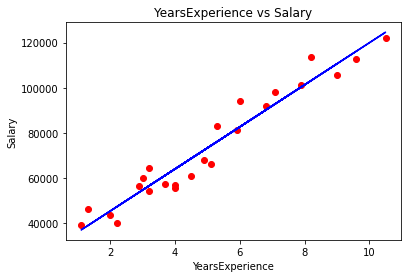

In [0]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title('YearsExperience vs Salary')  
plt.xlabel('YearsExperience')  
plt.ylabel('Salary')  
plt.show()

Visualising test dataset results

Predicted target output values of the test set will be on the same regression line as the predicted target output of the training set as the same fucntion values- intercept and coefficient are used by the linear regression model

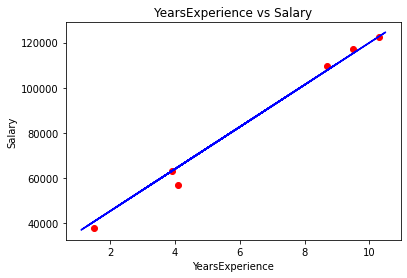

In [0]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title('YearsExperience vs Salary')  
plt.xlabel('YearsExperience')  
plt.ylabel('Salary')  
plt.show()

Regression line is a straight line coming as close as possible to the real values of the predicted target output. Regression line is the best fitting line for the minimum errors calculated by mean of euclidian distance between y_test and y_pred
